In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# package for ignoring warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_car = pd.read_csv('./cars-dataset.csv')

In [3]:
df_car.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
for col in df_car.columns:
    count = df_car[col].isna().sum()
    print('Nan in column {} is {}.'.format(col, count))

Nan in column car name is 0.
Nan in column cyl is 0.
Nan in column disp is 0.
Nan in column hp is 0.
Nan in column wt is 0.
Nan in column acc is 0.
Nan in column yr is 0.
Nan in column mpg is 0.


- NaN in the columns are 0.

In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


#### Imputing Value for the columns that has ? / Nan and converting the datatype from object to int/float

In [6]:
# replacing ? with NaN, so that it can be imputed with median/mean
df_car['hp'] = df_car['hp'].replace(r'?', np.NaN)

In [7]:
df_car.reset_index(inplace = True)

In [8]:
# filtering all the records that has no NaN in hp column
hpNoNAN = df_car[~df_car['hp'].isna()]
hpNAN = df_car[df_car['hp'].isna()]
mylist = hpNAN['index'].unique()

In [9]:
# imputing median as hp value for the records having NaN as hp value
for id in mylist:
    cyl = df_car.loc[np.where(df_car['index']==id)]['cyl'].tolist()[0] #age of the negtive exp record
    #education = df.loc[np.where(df['index']==id)]["Education"].tolist()[0] #education of the negative exp record
    df_filtered = hpNoNAN[(hpNoNAN['cyl'] == cyl)] 
    hpmedian = df_filtered['hp'].median()
    df_car.loc[df_car.loc[np.where(df_car['index']==id)].index, 'hp'] = int(hpmedian)

In [10]:
# converting the object type to int type
df_car['hp'] = df_car['hp'].astype('int64')

In [11]:
df_car.drop(columns=['index'], axis=0, inplace=True)

#### Use pair plot or scatter matrix to visualize how the different variables are related

In [12]:
# car name variable is not of great importance and doenst contribute to the clustering in a significant way, hence removing it
df_car=df_car.drop(['car name'],axis=1)
dfheir = df_car

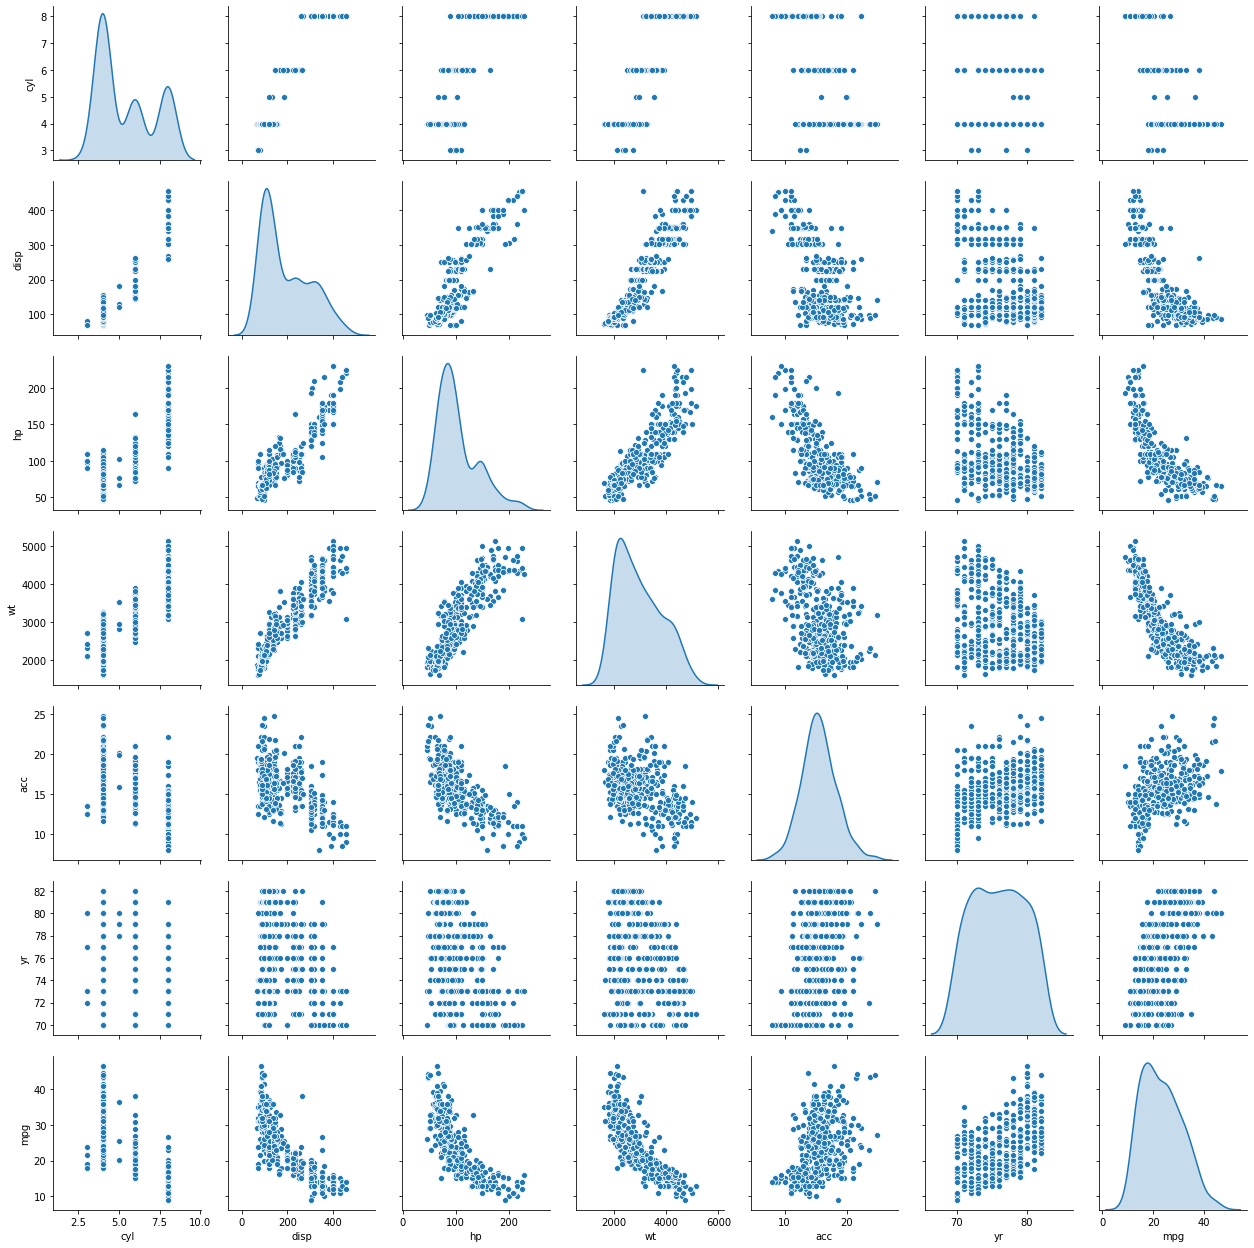

In [13]:
sns.pairplot(df_car,diag_kind='kde')
plt.show()

#### KMeans Clustering Techinique

In [14]:
# importing required library for clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import cdist

In [15]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_car)
    distortions.append(sum(np.min(cdist(df_car, kmeans.cluster_centers_, 'euclidean'), axis=1))**2 / df_car.shape[0])

In [16]:
#Breaking down the for loop logic

#The compute distance function output is as follows - a 17x9 Matrix 
#(Since the last kmeans in the for loop is run for 9 centroids)

cdist(df_car,kmeans.cluster_centers_,'euclidean')

array([[ 854.75884658, 1283.28952996,  214.66868523, ..., 1586.12810767,
        1291.71405966,  523.27691154],
       [ 663.09138936, 1478.25283867,  410.72031863, ..., 1780.83226861,
        1100.04229722,  335.78280173],
       [ 921.26683921, 1219.10896076,  161.9273947 , ..., 1521.49033646,
        1358.37661361,  590.9539237 ],
       ...,
       [2075.36842606,   65.07332559, 1012.85376603, ...,  364.11727315,
        2511.79455707, 1743.05633021],
       [1750.33842645,  387.61302767,  688.06895443, ...,  691.41862279,
        2185.94261348, 1417.91160342],
       [1656.46312111,  482.5357834 ,  594.9132747 , ...,  786.31559563,
        2091.79776375, 1324.11064308]])

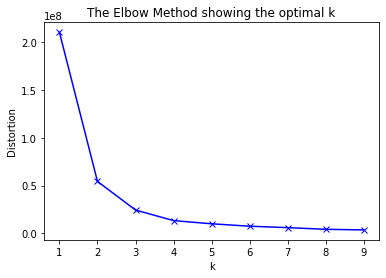

In [17]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [18]:
from scipy.stats import zscore
df_car = df_car.apply(zscore)
df_car.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.676181,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.590844,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.198845,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.198845,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.937513,0.565841,-1.840117,-1.627426,-0.834543


In [19]:
# using the cluster value as 4
kmeans = KMeans(n_clusters=4)

In [20]:
kmeans.fit(df_car)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
labels = kmeans.predict(df_car)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.49819126  1.50392292  1.5227306   1.40409797 -1.0861486  -0.68832385
  -1.16379715]
 [-0.82534015 -0.78164519 -0.74830929 -0.76856959  0.37498307  1.10179281
   1.18017325]
 [ 0.42558031  0.30810076 -0.02738371  0.34575408  0.29922485  0.05143538
  -0.49876792]
 [-0.85043429 -0.79990271 -0.55364884 -0.75486144  0.32419661 -0.65531123
   0.19746294]]


In [22]:
centroids_df = pd.DataFrame(centroids, columns = df_car.columns)
centroids_df

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.503923,1.522731,1.404098,-1.086149,-0.688324,-1.163797
1,-0.825340,-0.781645,-0.748309,-0.768570,0.374983,1.101793,1.180173
2,0.425580,0.308101,-0.027384,0.345754,0.299225,0.051435,-0.498768
3,-0.850434,-0.799903,-0.553649,-0.754861,0.324197,-0.655311,0.197463


In [23]:
clusters = kmeans.labels_
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 2, 3, 3,
       3, 3, 3, 2, 3, 0, 0, 3, 3, 3, 3, 0, 3, 2, 0, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 3, 3, 2, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3,
       1, 2, 2, 2, 2, 3, 1, 3, 3, 3, 0, 3, 2, 2, 0, 0, 0, 0, 1, 1, 1, 3,
       1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 3, 3, 3, 1, 1, 1, 1, 2,
       3, 3, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 3, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2,

In [24]:
prediction = kmeans.predict(df_car)
car_pred = pd.DataFrame(df_car)
car_pred['Group'] = prediction

#### Using Hierarchical Clustering Techinique

In [25]:
cols = dfheir.columns

In [26]:
# importing scalar function to regularise the data
from sklearn.preprocessing import normalize
dfheir = normalize(dfheir)
dfheir = pd.DataFrame(dfheir, columns=cols)
dfheir.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883,0.005113
1,0.002154,0.094240,0.044427,0.994364,0.003096,0.018848,0.004039
2,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262,0.005210
3,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287,0.004637
4,0.002308,0.087137,0.040395,0.995153,0.003030,0.020197,0.004905


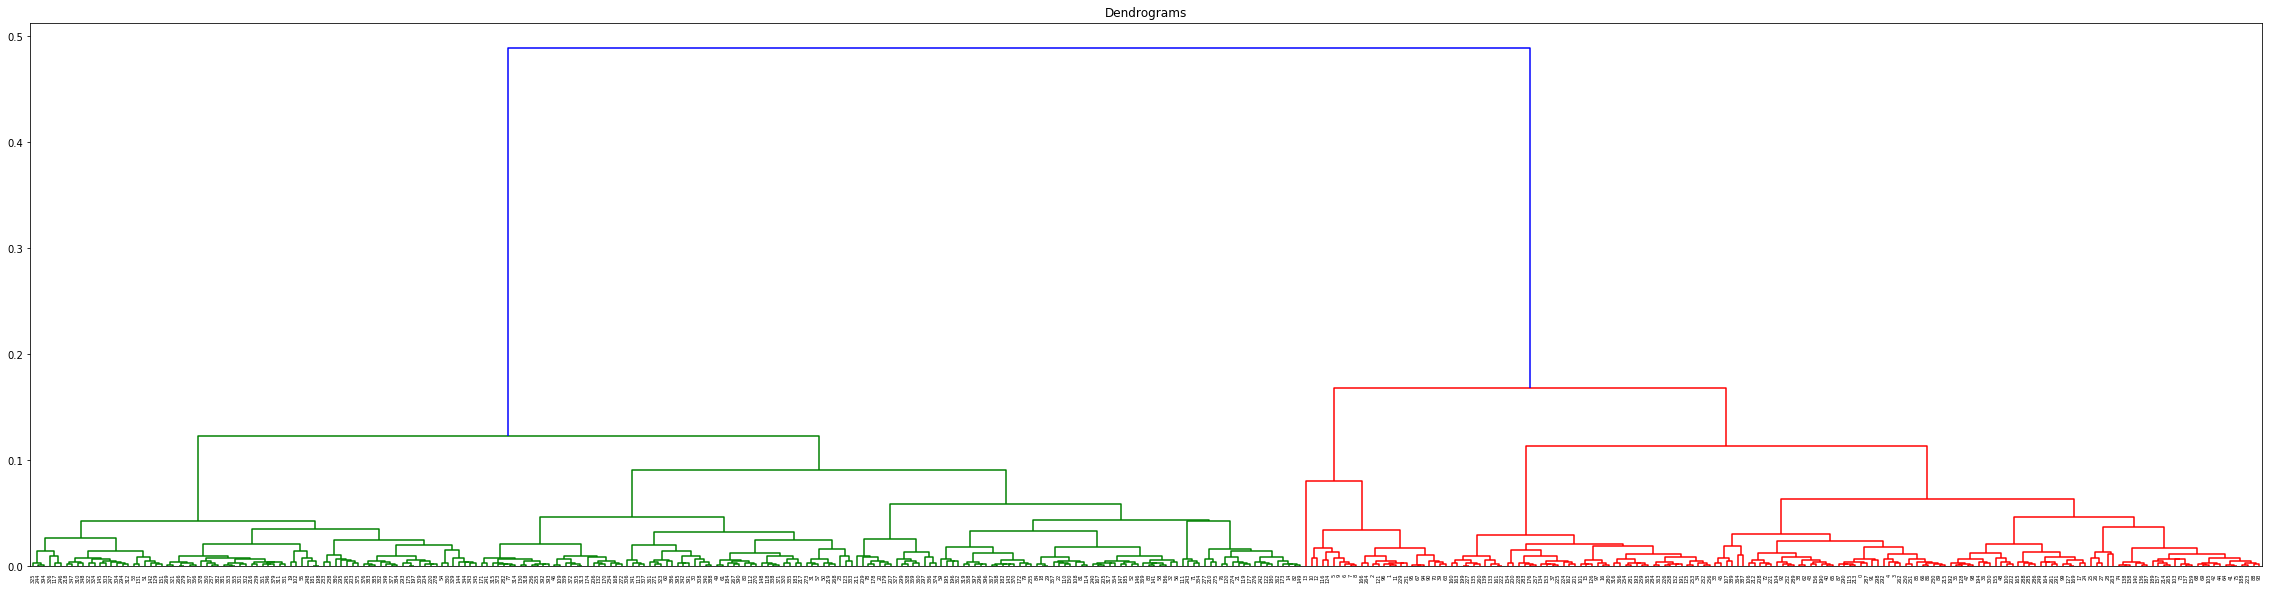

In [27]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(40, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dfheir, method='ward'))

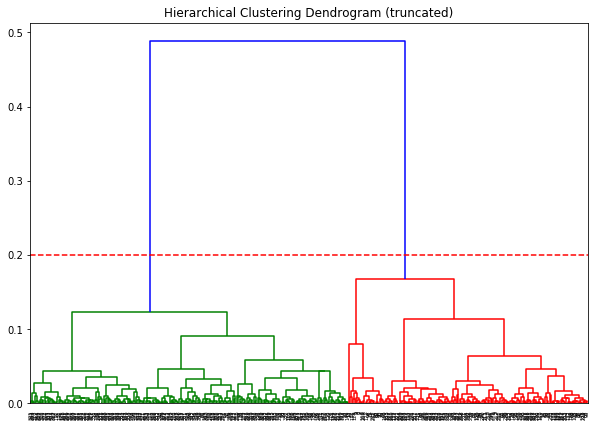

In [28]:
plt.figure(figsize=(10, 7))  
plt.title("Hierarchical Clustering Dendrogram (truncated)")  
dend = shc.dendrogram(shc.linkage(dfheir, method='ward'))
plt.axhline(y=.2, color='r', linestyle='--')

In [29]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [30]:
group = cluster.fit_predict(dfheir)

In [31]:
dfheir['Group'] = group

In [32]:
dfheir.head()

,cyl,disp,hp,wt,acc,yr,mpg,Group
0,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883,0.005113,0
1,0.002154,0.094240,0.044427,0.994364,0.003096,0.018848,0.004039,0
2,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262,0.005210,0
3,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287,0.004637,0
4,0.002308,0.087137,0.040395,0.995153,0.003030,0.020197,0.004905,0


#### Use linear regression model on different clusters separately and print the coefficients of the models individually

- Hierarchical is yeilding only <b> 2 cluster </b> where as KMeans cluster is yeilding </b> 4 clusters </b>, henceforth we will use the dataset obtained from KMeans clustering for <b> Linear Regression </b>

In [33]:
cars_0=car_pred[car_pred['Group']==0]
cars_1=car_pred[car_pred['Group']==1]
cars_2=car_pred[car_pred['Group']==2]
cars_3=car_pred[car_pred['Group']==3]

cargp = [(cars_0,'First Cluster'), (cars_1,'Second Cluster'), (cars_2,'Thrid Cluster'), (cars_3,'Forth Cluster')]

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
for car in cargp:
    X=car[0].drop(['mpg'],axis=1)
    y=car[0]['mpg']

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 1)

    lr = LinearRegression(n_jobs= 5)
    lr.fit(X_train,y_train)

    print("{} Training score".format(car[1]))
    print(lr.score(X_train,y_train))
    print("{} Testing score".format(car[1]))
    print(lr.score(X_test,y_test))
    print('')
    print('Coefficients of {}'.format(car[1]))
    print(lr.coef_)
    print(lr.intercept_)
    print('--' * 40)

First Cluster Training score
0.6349132439392119
First Cluster Testing score
0.3122518301378142

Coefficients of First Cluster
[ 0.          0.00541095 -0.16723783 -0.14001796 -0.167269    0.14723398
  0.        ]
-0.7921001899766937
--------------------------------------------------------------------------------
Second Cluster Training score
0.5456610965337083
Second Cluster Testing score
0.5234870967201577

Coefficients of Second Cluster
[ 0.74244696  0.2297185  -0.36086903 -1.03808658  0.17276848  0.41195495
  0.        ]
0.39517512590667736
--------------------------------------------------------------------------------
Thrid Cluster Training score
0.49649494538646505
Thrid Cluster Testing score
0.3580354581560672

Coefficients of Thrid Cluster
[ 0.1977582  -0.01769432 -0.16623379 -0.40965663 -0.00160909  0.23934031
  0.        ]
-0.44413341012565055
--------------------------------------------------------------------------------
Forth Cluster Training score
0.6055963484543272
Forth